## Turmunkh Zorigt ECON128 Problem Set 3

## Problem 1
### Suppose this sample of firms is an index. Filter the sample to observations that record daily data from 2000-present. Calculate average daily returns for banks during that period. (Hint: first compute daily returns using the closing price for each bank, then take the average for that day). Plot the returns.

In [1]:
from numpy import *
import pandas as pd

In [2]:
#import dataset
df = pd.read_csv('bank-stocks-merged.txt', sep ='\t', header=0)

In [3]:
df.shape

(653006, 7)

In [4]:
df.head()

,?Date,Ticker,Open,High,Low,Close,Volume
0,5/19/1994,ABCB,5.064261,5.368117,5.064261,5.266831,1347.679366
1,5/20/1994,ABCB,5.165546,5.368117,5.064261,5.266831,545.489267
2,5/23/1994,ABCB,5.266831,5.266831,5.064261,5.064261,167.842851
3,5/24/1994,ABCB,5.266831,5.266831,5.064261,5.064261,78.984871
4,5/25/1994,ABCB,5.165546,5.165546,5.064261,5.064261,135.755247


In [5]:
#check for missing values
df.apply(lambda x: sum(x.isnull()),axis=0)

?Date     0
Ticker    0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [6]:
#rename first column
df.rename(columns={"?Date" : "Date"},inplace=True)
df.head()

,Date,Ticker,Open,High,Low,Close,Volume
0,5/19/1994,ABCB,5.064261,5.368117,5.064261,5.266831,1347.679366
1,5/20/1994,ABCB,5.165546,5.368117,5.064261,5.266831,545.489267
2,5/23/1994,ABCB,5.266831,5.266831,5.064261,5.064261,167.842851
3,5/24/1994,ABCB,5.266831,5.266831,5.064261,5.064261,78.984871
4,5/25/1994,ABCB,5.165546,5.165546,5.064261,5.064261,135.755247


In [7]:
#remove Question Marks from Date column
newdf = []
for entry in df["Date"]:
    if entry[0]=="?": #search for ? in Date column
        entry = entry[1:len(entry)] #remove if found
    newdf.append(entry)
newdf = pd.Series(newdf) # convert list to series
df["Date"] = newdf #replace fixed dates 
df.head()

,Date,Ticker,Open,High,Low,Close,Volume
0,5/19/1994,ABCB,5.064261,5.368117,5.064261,5.266831,1347.679366
1,5/20/1994,ABCB,5.165546,5.368117,5.064261,5.266831,545.489267
2,5/23/1994,ABCB,5.266831,5.266831,5.064261,5.064261,167.842851
3,5/24/1994,ABCB,5.266831,5.266831,5.064261,5.064261,78.984871
4,5/25/1994,ABCB,5.165546,5.165546,5.064261,5.064261,135.755247


In [8]:
#convert date column to datetime
df["Date"] = pd.to_datetime(df["Date"],format = "%m/%d/%Y") 
df.dtypes

Date      datetime64[ns]
Ticker            object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [9]:
from datetime import datetime,date,timedelta 

df = df.sort_values(by="Date") #sort by date
df_original = df #make copy data frame for Problem 2

In [10]:
#make boolean series on whether year greater than 2000
df2=df
df2=df2["Date"]>="1-1-2000"
df["2000_plus"] = pd.Series(df2)
df.head()

,Date,Ticker,Open,High,Low,Close,Volume,2000_plus
247518,1803-02-19,ALX2,260.0,260.0,260.0,260.0,0.0,False
247519,1803-02-26,ALX2,260.0,260.0,260.0,260.0,0.0,False
247520,1803-03-03,ALX2,260.0,260.0,260.0,260.0,0.0,False
247521,1803-03-12,ALX2,260.0,260.0,260.0,260.0,0.0,False
247522,1803-03-19,ALX2,267.0,267.0,267.0,267.0,0.0,False


In [11]:
#filter by year>2000 and make new dataframe
df2000 = df[df["2000_plus"] != False] 
df2000.head()

,Date,Ticker,Open,High,Low,Close,Volume,2000_plus
561955,2000-01-03,BSF1PRF,22.000000,22.125000,22.000000,22.125000,43.0,True
455152,2000-01-03,CTDN1,39.187500,39.187500,39.187500,39.187500,0.0,True
619113,2000-01-03,CCB2,43.625000,43.625000,41.375000,41.437500,1026.0,True
296738,2000-01-03,BNKA1,12.142857,13.095238,12.142857,12.142857,0.0,True
247082,2000-01-03,AICA1,18.250000,19.000000,18.250000,18.250000,0.0,True


In [12]:
df2000.shape

(347098, 8)

In [13]:
#find returns for each bank
pd.options.mode.chained_assignment = None  # disable SettingWithCopyWarning
df2000["Return"] = (df2000["Close"]-df2000["Open"]) / df2000["Close"]
df2000.head()

,Date,Ticker,Open,High,Low,Close,Volume,2000_plus,Return
561955,2000-01-03,BSF1PRF,22.000000,22.125000,22.000000,22.125000,43.0,True,0.00565
455152,2000-01-03,CTDN1,39.187500,39.187500,39.187500,39.187500,0.0,True,0.00000
619113,2000-01-03,CCB2,43.625000,43.625000,41.375000,41.437500,1026.0,True,-0.05279
296738,2000-01-03,BNKA1,12.142857,13.095238,12.142857,12.142857,0.0,True,0.00000
247082,2000-01-03,AICA1,18.250000,19.000000,18.250000,18.250000,0.0,True,0.00000


In [14]:
#collapse average Close by Date and Ticker
df_group = df2000.groupby(["Date", "Ticker"]).Return.mean()

#collapse average Close by Date to get average return for all banks in one day
df_group = df_group.groupby(["Date"]).mean()
df_group.head()

Date
2000-01-03   -0.005455
2000-01-04   -0.011031
2000-01-05    0.000319
2000-01-06    0.000891
2000-01-07    0.003488
Name: Return, dtype: float64

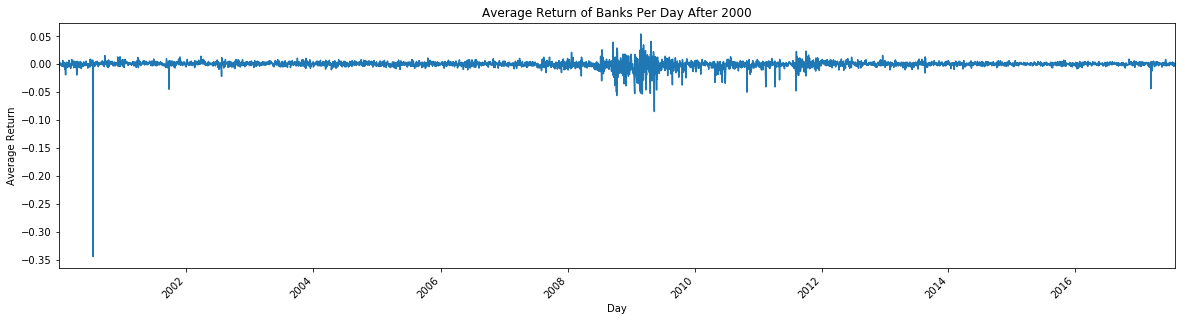

In [15]:
import matplotlib.pyplot as plt

#import line magic
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

#plot graph
dfplot = df_group.plot(kind="Line", figsize = (20,5), rot = 45, logx=True)#, rotation= "vertical")
dfplot.set(xlabel = "Day",ylabel = "Average Return", title = "Average Return of Banks Per Day After 2000")

In [16]:
df_group.head()

Date
2000-01-03   -0.005455
2000-01-04   -0.011031
2000-01-05    0.000319
2000-01-06    0.000891
2000-01-07    0.003488
Name: Return, dtype: float64

# Problem 2
### Suppose you are interested in the historical data. Since these data are monthly, calculate average monthly returns for banks from 1940-present. (Hint: use closing prices at the end of each month). Plot the returns.


In [17]:
#make boolean series on whether year greater than 1940
df2 = df_original
datelist= df2["Date"]>="1-1-1940"
df2["1940_plus"] = pd.Series(datelist) #insert it into df
df2.head()

,Date,Ticker,Open,High,Low,Close,Volume,2000_plus,1940_plus
247518,1803-02-19,ALX2,260.0,260.0,260.0,260.0,0.0,False,False
247519,1803-02-26,ALX2,260.0,260.0,260.0,260.0,0.0,False,False
247520,1803-03-03,ALX2,260.0,260.0,260.0,260.0,0.0,False,False
247521,1803-03-12,ALX2,260.0,260.0,260.0,260.0,0.0,False,False
247522,1803-03-19,ALX2,267.0,267.0,267.0,267.0,0.0,False,False


In [18]:
df1940 = df[df["1940_plus"] != False] #filter by year>1940 and make new dataframe
df1940.head()

,Date,Ticker,Open,High,Low,Close,Volume,2000_plus,1940_plus
7217,1940-01-31,ANAC1,160.000000,160.000000,160.000000,160.000000,0.0,False,True
300084,1940-01-31,BOKC1,4.750000,5.000000,4.500000,4.750000,0.0,False,True
639448,1940-01-31,CLVB1,75.000000,75.000000,75.000000,75.000000,0.0,False,True
605699,1940-01-31,CBCT1,103.703704,103.703704,103.703704,103.703704,0.0,False,True
371950,1940-01-31,CNJK1,70.000000,75.000000,65.000000,70.000000,0.0,False,True


In [25]:
import datetime as dt

# Create month-year pairs by collapsing datetime series by month
df1940['month_year'] = df1940.Date.dt.to_period('M')
df1940.head()


dtype('float64')

In [20]:
df1940["Return"] = (df1940["Close"]-df1940["Open"]) / df1940["Close"] #calculate Returns
df1940 = df1940.groupby(["month_year"]).Return.mean() #take average of bank's returns, collapse by month-year pairs
df1940.head()

month_year
1940-01    0.000494
1940-02   -0.003138
1940-03    0.002901
1940-04    0.001301
1940-05   -0.014550
Freq: M, Name: Return, dtype: float64

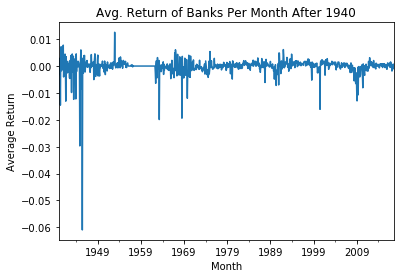

In [21]:
dfplot = df1940.plot() #plot returns
dfplot.set(xlabel = "Month", ylabel = "Average Return", title = "Avg. Return of Banks Per Month After 1940")

#the graph has dips where there have been recessions, which is correlated with stock market crashes.
#notable ones include the Great Depression in 1940s, the Dot Com Bubble in 2000, and the Great Recession in 2008